# Задание 1
ПРАКТИЧЕСКАЯ ЧАСТЬ
Составьте программу имитационного моделирования движения
автобуса для α и β-стратегий в соответствии с блок-схемой

Для анализа длительности прогонов модели на точность оценок,
постройте на основе результатов моделирования графики зави-
симостей среднего числа рейсов Мα и Мβ для количества модели-
руемых дней равном 1, 2, 3, 4, 5, 10, 20 и 90 дней.
На этих же графиках укажите точное значение соответствующих
средних значений Мα и Мβ. Принять требуемое число рейсов в
день равное 10 и РА = 0.4, РВ = 0.7.

Импортируем необходимые модули

In [106]:
import random
import seaborn
import numpy as np
import pandas as pd
import math
import tabulate
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from typing import Callable

Сделаем вспомогательную функцию "сломается ли"

In [107]:
def it_will_break(p: float) -> bool:
    r = random.random()
    if r < p:
        return True 
    return False

Напишем функции моделирования схемы альфа и подсчета аналитического решения

In [108]:
def alpha_day(trip_count: int, pa, pb: float) -> int:
    count = 0
    fixing = False
    for i in range(trip_count):
        if not fixing:
            count += 1
            fixing = it_will_break(pa)
        else:
            fixing = False
    return count


def alpha_real(trip_count: int, pa, pb: float) -> float:
    return trip_count/(1+pa)+pa*(1-(-pa)**trip_count)/(1+pa)**2

Аналогично для схемы бета

In [109]:
def beta_day(trip_count: int, pa, pb: float) -> int:
    count = 0
    damage = False
    for i in range(trip_count):
        count += 1
        if damage and it_will_break(pb):
            break
        else:
            damage = damage or it_will_break(pa)
    return count


def beta_real(trip_count: int, pa, pb: float) -> float:
    if pa == 0 or pb == 0 or pa-pb == 0:
        return 0
    return ((pa**2)*(1-(1-pb)**trip_count)-(pb**2)*(1-(1-pa)**trip_count))/(pa*pb*(pa-pb))

Сделаем функцию подсчета среднего числа рейсов за N дней

In [110]:
def strategy_period_mean(days, trip_count, pa, pb: int, day_func: Callable[[int, float, float], int]) -> float:
    period_data = list()
    for i in range(days):
        period_data.append(day_func(trip_count, pa, pb))
    return np.mean(np.array(period_data))

Протестируем

In [111]:
days_count = 500000
trip_count = 10
pa = 0.4
pb = 0.7

a_model = strategy_period_mean(days_count, trip_count, pa, pb, alpha_day)
a_real = alpha_real(trip_count, pa, pb)

b_model = strategy_period_mean(days_count, trip_count, pa, pb, beta_day)
b_real = beta_real(trip_count, pa, pb)

print(f'Days: {days_count}')
print(f'Trips per day: {trip_count}')
print(f'PA: {pa}')
print(f'PB: {pb}')
print()
print(f'Alpha model: {a_model:8.5f}')
print(f'Alpha real:  {a_real:8.5f}')
print(f'Beta model:  {b_model:8.5f}')
print(f'Beta real:   {b_real:8.5f}')

Days: 500000
Trips per day: 10
PA: 0.4
PB: 0.7

Alpha model:  7.34937
Alpha real:   7.34692
Beta model:   3.89172
Beta real:    3.89331


# Задание 2
С помощью разработанной программы постройте параметриче-
ские графики зависимостей среднего числа рейсов Мα и Мβ от ве-
роятности перехода РА, задав длительность моделирования 90
дней при требуемом числе рейсов в день равном 10.
Для построения графиков рекомендуется задать следующее
множество значений вероятностей
РА ={0, 0.1, 0.2, 0.3, ..., 0.9, 1 },
при значениях параметра РВ= {0.05, 0.11, 0.15, 0.19, 0.23, 0.7 }.
Сравните полученные зависимости с графиками точных значений
соответствующих средних значений, полученными по формулам.

Сделайте (письменно) выводы по работе, касающиеся рекоменда-
ций по методике выбора той или иной стратегии обслуживания для
различных параметров задачи.

Удобным образом генерируем дни

In [112]:
day0 = 1
days_max = 10000
days = [day0]

while (day0 < days_max):
    day0 *= 2
    days.append(int(day0))
    day0 *= 2.5
    days.append(int(day0))
    day0*=2
    days.append(int(day0))

# this will generate [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
#                     |                                     |
#                     |                                     |
#                     1 is day0, power of ten             1000 is days_max, also power of ten

Генерируем датасет и подсчитываем точные значения

In [113]:
trip_count = 10
pa = 0.4
pb = 0.7

a_real = alpha_real(trip_count, pa, pb)
b_real = beta_real(trip_count, pa, pb)

data = list()

for days_count in days:
    a_model = strategy_period_mean(days_count, trip_count, pa, pb, alpha_day)
    b_model = strategy_period_mean(days_count, trip_count, pa, pb, beta_day)
    data.append(['alpha', str(days_count), a_model])
    data.append(['alpha_real', str(days_count), a_real])
    data.append(['beta', str(days_count), b_model])
    data.append(['beta_real', str(days_count), b_real])


df = pd.DataFrame(data, columns = ['strategy', 'days', 'trips_per_day'])
# df.sort_values(by=['strategy', 'days'], inplace=True)
print(df)

      strategy   days  trips_per_day
0        alpha      1       9.000000
1   alpha_real      1       7.346917
2         beta      1       4.000000
3    beta_real      1       3.893311
4        alpha      2       7.000000
5   alpha_real      2       7.346917
6         beta      2       3.000000
7    beta_real      2       3.893311
8        alpha      5       6.800000
9   alpha_real      5       7.346917
10        beta      5       3.400000
11   beta_real      5       3.893311
12       alpha     10       6.700000
13  alpha_real     10       7.346917
14        beta     10       3.600000
15   beta_real     10       3.893311
16       alpha     20       7.500000
17  alpha_real     20       7.346917
18        beta     20       3.900000
19   beta_real     20       3.893311
20       alpha     50       7.480000
21  alpha_real     50       7.346917
22        beta     50       4.080000
23   beta_real     50       3.893311
24       alpha    100       7.470000
25  alpha_real    100       7.346917
2

Построим линейные графики

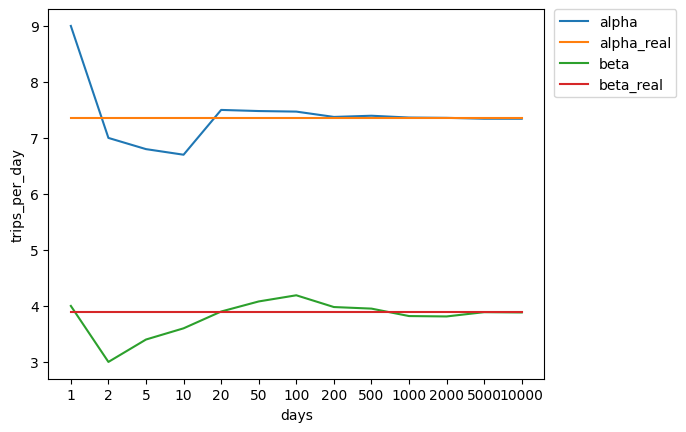

In [114]:
g = seaborn.lineplot(df, x='days', y='trips_per_day', hue='strategy')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) # for legend


Вывод:На графике прямая Alpha показывает наибольшее среднее значение рейсов – 5, на отрезке [1,2], на отрезке [2,20]
 прямая распологается ниже прямой Alpha_real – 3. После данного промежутка убывания прямая Alpha начинает совпадать с прямой Alpha_real. График Beta начинает сходится с  Beta_real лишь с 5000 дня. Из чего оптимальным выбором является стратегия alpha.